In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "StrawberryVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 5568 files belonging to 6 classes.


In [5]:
class_names = dataset.class_names
class_names

['Healthy',
 'Leaf Scorch',
 'Unknown',
 'angular leafspot',
 'leaf spot',
 'powdery mildew leaf']

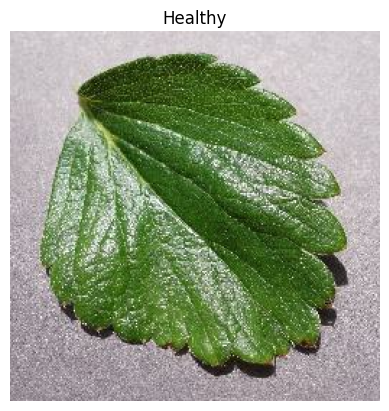

In [6]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

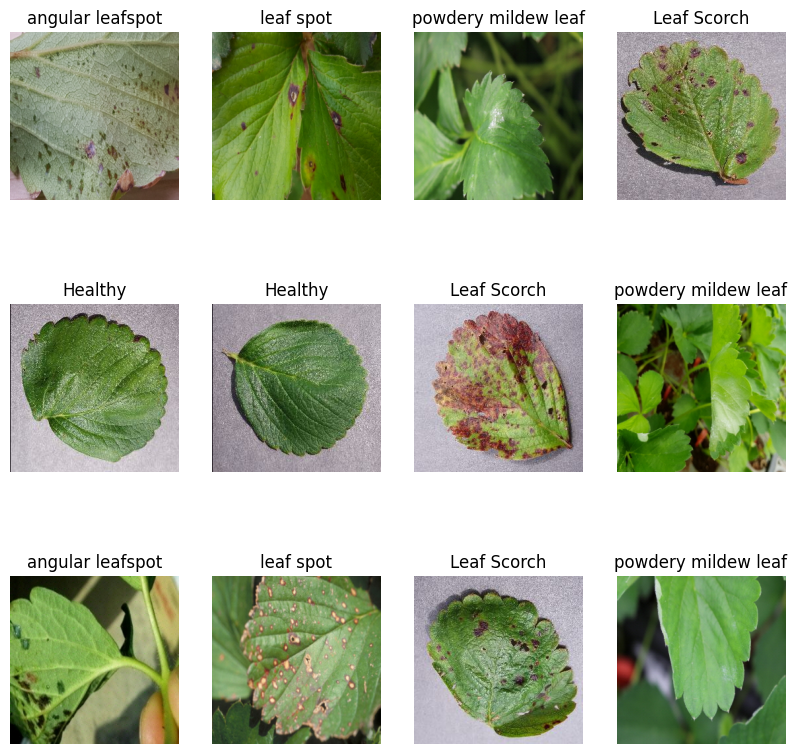

In [7]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
def get_dataset_partitions_tf(dataset, training_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed = 12)
    training_size = int(training_split * ds_size)
    val_size = int(val_split * ds_size)
    training_ds = dataset.take(training_size)
    val_ds = dataset.skip(training_size).take(val_size)
    test_ds = dataset.skip(training_size).skip(val_size)
    return training_ds, val_ds, test_ds

training_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
len(training_ds)

139

In [10]:
len(val_ds)

17

In [11]:
len(test_ds)

18

In [12]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [15]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    ])
model.build(input_shape = input_shape)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 6)                     │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,086 (1.06 MB)

 Trainable params: 278,086 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    training_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.5132 - loss: 1.2058 - val_accuracy: 0.7776 - val_loss: 0.5955
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 350s 3s/step - accuracy: 0.8316 - loss: 0.4264 - val_accuracy: 0.8438 - val_loss: 0.4196
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.8863 - loss: 0.3093 - val_accuracy: 0.9173 - val_loss: 0.2003
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9162 - loss: 0.2339 - val_accuracy: 0.9449 - val_loss: 0.1639
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.9359 - loss: 0.1754 - val_accuracy: 0.9577 - val_loss: 0.1150
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9514 - loss: 0.1548 - val_accuracy: 0.9504 - val_loss: 0.1472
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9402 - loss: 0.1800 - val_accuracy: 0.9743 - val_loss: 0.0907
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9606 - loss: 0.1118 - val_accu

In [19]:
scores = model.evaluate(test_ds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 634ms/step - accuracy: 0.9823 - loss: 0.0609


In [20]:
scores

[0.07157924771308899, 0.9756944179534912]

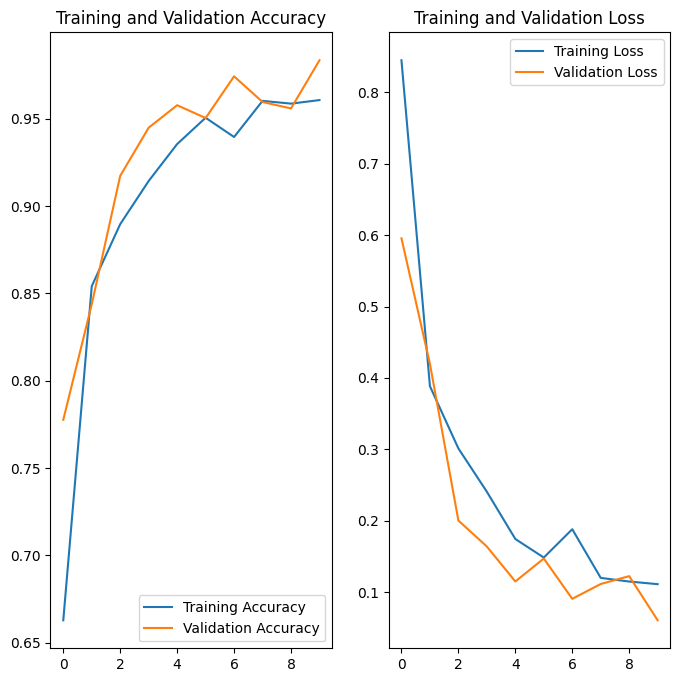

In [21]:
# Plotting a matplotlib chart
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual_label: Leaf Scorch


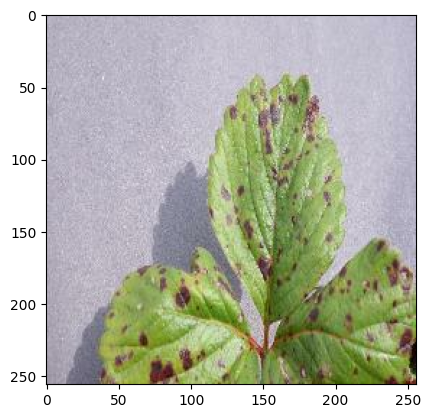

In [22]:
# Getting the actual label of our image
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:", class_names[first_label])

In [23]:
batch_prediction = model.predict(image_batch)
# converting it to a class name
print("predicted_leabel:", class_names[np.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted_leabel: angular leafspot


In [24]:
# function that takes the model and image and highlights what is the predicted class and confidence
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


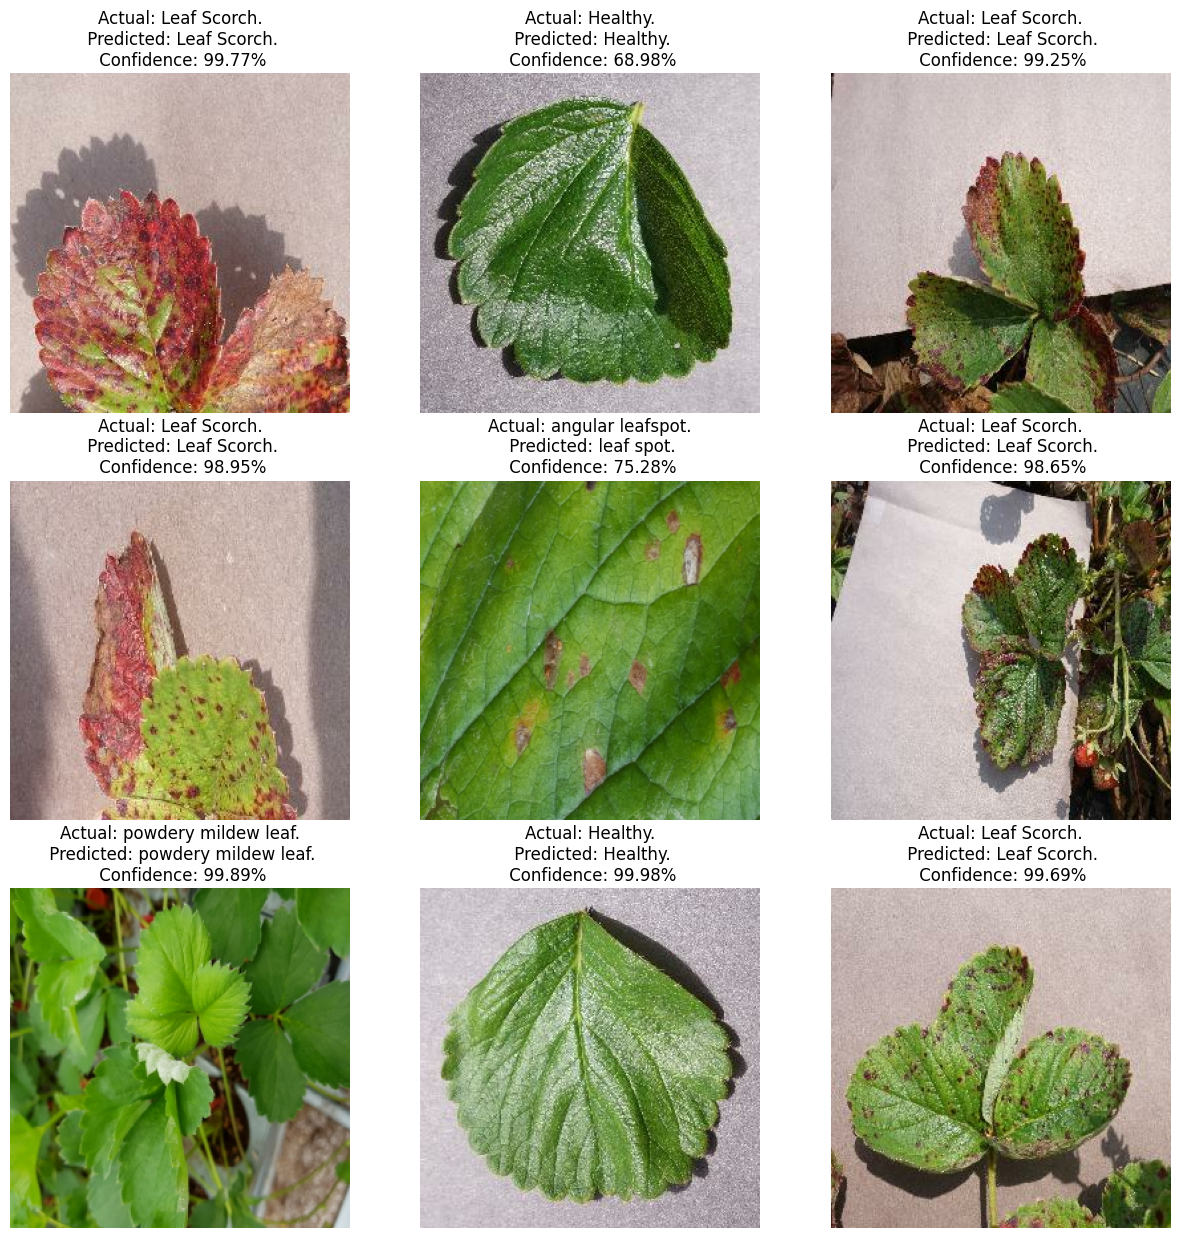

In [25]:
# Taking images from the test_ds and using the predict model to predict images and highlight the confidence
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
   for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i].numpy()]
        plt.title(f"Actual: {actual_class}.\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [26]:
import os

model_version = max([int(i.split('.')[0]) for i in os.listdir("../strawberry") if i.split('.')[0].isdigit()] + [0]) + 1
model.export(f"../strawberry/{model_version}")

INFO:tensorflow:Assets written to: ../strawberry/1\assets


INFO:tensorflow:Assets written to: ../strawberry/1\assets


Saved artifact at '../strawberry/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2241262411744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262411920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262413328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262414560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262414208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262415088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262413504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262415968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262413856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262416320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241262415792: TensorSpec(shape=(),